
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W10/W10P3.ipynb)


In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels
import scipy

In [2]:
def to_dataframe(text: str):
    """

    Parameters
    ----------
    text : this dude is a text file (a string actually).

    Returns
    -------
    Pandas dataframe

    """
    L = []
    headers = []
    with open(text) as file:
        T = file.readlines()
        for i, t in enumerate(T):
            if i == 0:
                for header  in t[:-1].split():
                  headers.append(header)
            else:
                L.append(t[0:-1].split())
    L = pd.DataFrame(L)

    L = L.apply(pd.to_numeric)
    L.columns = headers
    return L

def download_data():  ### This dude will download the dataset from the directory directly!
  !wget https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch4data.zip
  !unzip "/content/ch4data.zip" -d "/content/ch4data/"
  if not os.getcwd() == '/content/ch4data':
    os.chdir("ch4data")
  else:
    print(f"Current directory is now {os.getcwd()}")
download_data()

--2024-05-06 16:13:33--  https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch4data.zip
Resolving faculty.chicagobooth.edu (faculty.chicagobooth.edu)... 128.135.211.142
Connecting to faculty.chicagobooth.edu (faculty.chicagobooth.edu)|128.135.211.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216825 (212K) [application/x-zip-compressed]
Saving to: ‘ch4data.zip’

ch4data.zip         100%[===================>] 211.74K  1.01MB/s    in 0.2s    

2024-05-06 16:13:34 (1.01 MB/s) - ‘ch4data.zip’ saved [216825/216825]

Archive:  /content/ch4data.zip
  inflating: /content/ch4data/d-pg-0111.txt  
  inflating: /content/ch4data/d-sp58010.txt  
  inflating: /content/ch4data/d-spy-0111.txt  
  inflating: /content/ch4data/d-useu9910.txt  
  inflating: /content/ch4data/m-ibmsp6709.txt  
  inflating: /content/ch4data/m-intcsp7309.txt  
  inflating: /content/ch4data/m-ko-6111.txt  
  inflating: /content/ch4data/m-sp56710.txt  


In [3]:
data_ = to_dataframe("m-intcsp7309.txt")
data_

,date,intc,sp
0,19730131,0.010050,-0.017111
1,19730228,-0.139303,-0.037490
2,19730330,0.069364,-0.001433
3,19730430,0.086486,-0.040800
4,19730531,-0.104478,-0.018884
...,...,...,...
439,20090831,0.062857,0.033560
440,20090930,-0.036909,0.035723
441,20091030,-0.023505,-0.019762
442,20091130,0.012036,0.057364


In [4]:
data= data_["intc"]

In [5]:
log_1 = lambda x: np.log(x+1)

In [6]:
data = data.apply(log_1)

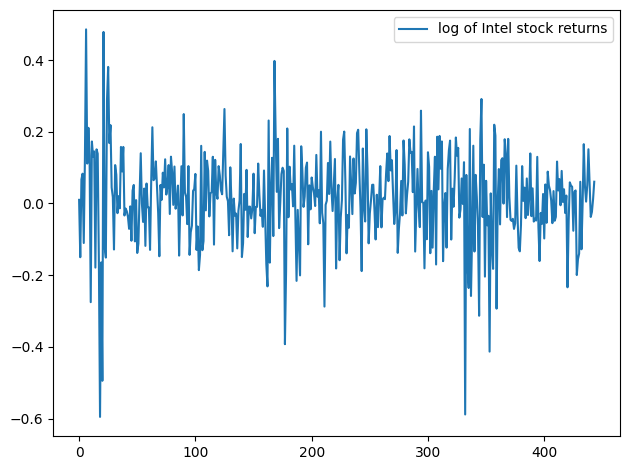

In [7]:
plt.plot(data, label = "log of Intel stock returns")
plt.legend()
plt.tight_layout()

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [9]:
from statsmodels.tsa.arima.model import ARIMA

In [10]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(data, order = (0,0,0))  ### we fit the mean equation
model = mod.fit()

In [11]:
at = model.resid

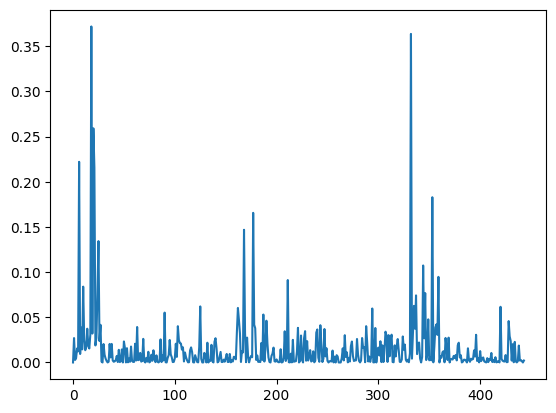

In [12]:
plt.plot(np.square(at))

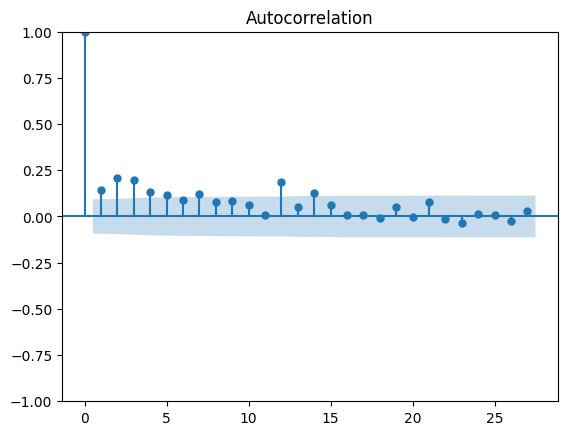

In [13]:
plot_acf(np.square(at));

In [14]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(np.square(at), return_df = True, lags = 12) ### there is serieal correlation of the residuals therefore an ARCH effect is present.

,lb_stat,lb_pvalue
1,9.413683,2.153722e-03
2,28.710337,5.829477e-07
3,45.887155,5.993622e-10
4,53.790775,5.821221e-11
5,59.840537,1.311263e-11
6,63.321386,9.492126e-12
7,69.906859,1.542866e-12
8,72.510162,1.552309e-12
9,75.676726,1.161629e-12
10,77.310472,1.686344e-12


[See here](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_arch.html)  for Engel's Het test.

In [15]:
statsmodels.stats.diagnostic.het_arch(at, nlags = 12) ####There is a strong ARCH effect here!

(53.90124090435578,
 2.845897921453057e-07,
 4.977672145972329,
 9.739345398055665e-08)

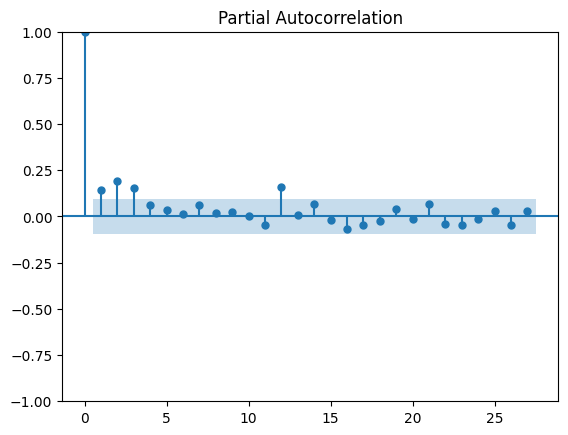

In [16]:
plot_pacf(np.square(at));

In [17]:
!pip install arch
import arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 8.0 MB/s eta 0:00:00


In [29]:
mod = arch.arch_model(data, q = 1, vol = "ARCH", )  ### Fitting an ARCH(1) model here!
model = mod.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 6365.149087989967
Iteration:      2,   Func. Count:     14,   Neg. LLF: 44.159460390905735
Iteration:      3,   Func. Count:     21,   Neg. LLF: -281.25474865320325
Iteration:      4,   Func. Count:     26,   Neg. LLF: -299.6935046289766
Iteration:      5,   Func. Count:     30,   Neg. LLF: -299.6935113262524
Iteration:      6,   Func. Count:     33,   Neg. LLF: -299.69351132621836
Optimization terminated successfully    (Exit mode 0)
            Current function value: -299.6935113262524
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01607. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                   intc   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                299.694
Distribution:                  Normal   AIC:                          -593.387
Method:            Maximum Likelihood   BIC:                          -581.100
                                        No. Observations:                  444
Date:                Mon, May 06 2024   Df Residuals:                      443
Time:                        16:22:13   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0131  5.754e-03      2.283  2.245e-02 [1.857e-03,2.441e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0111  1.507e-03      7.357  1.885e-13 [8.135e-03,1.404e-02]
alpha[1]       0.3700      0.168      2.197  2.799e-02   [3.999e-02,  0.700]
============================================================================

Covariance estimator: robust
"""

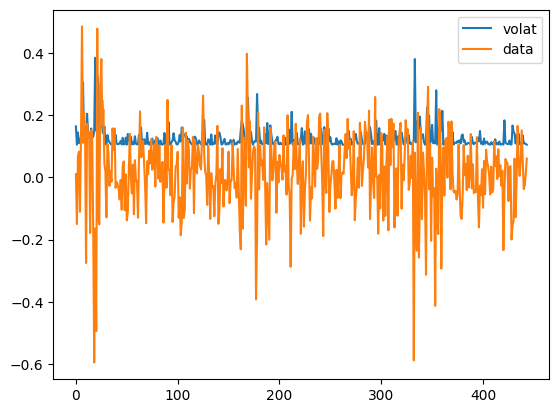

In [31]:
plt.plot(model.conditional_volatility, label = "volat")
plt.plot(data, label = "data")
plt.plot()
plt.legend()
plt.show()

In [ ]:
model.tvalues

In [ ]:
from arch import arch_model

In [52]:
mod = arch.arch_model(data,  p = 3, vol = "ARCH", dist = "gaussian", mean = "AR", lags = 10)
model = mod.fit()

Iteration:      1,   Func. Count:     17,   Neg. LLF: 4586.243754053164
Iteration:      2,   Func. Count:     37,   Neg. LLF: 32099.531519627588
Iteration:      3,   Func. Count:     57,   Neg. LLF: 347105.17324635765
Iteration:      4,   Func. Count:     76,   Neg. LLF: 801166.5976526393
Iteration:      5,   Func. Count:     94,   Neg. LLF: 91277.6149776667
Iteration:      6,   Func. Count:    111,   Neg. LLF: 224149.1501250938
Iteration:      7,   Func. Count:    129,   Neg. LLF: 88535.60187787068
Iteration:      8,   Func. Count:    147,   Neg. LLF: -161.26485438517665
Iteration:      9,   Func. Count:    165,   Neg. LLF: 242.24204623608193
Iteration:     10,   Func. Count:    184,   Neg. LLF: -82.19886697970978
Iteration:     11,   Func. Count:    202,   Neg. LLF: 110377.55925192009
Iteration:     12,   Func. Count:    220,   Neg. LLF: -270.8584009286107
Iteration:     13,   Func. Count:    238,   Neg. LLF: -287.22708409393965
Iteration:     14,   Func. Count:    255,   Neg. LLF: -

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01515. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - ARCH Model Results                            
==============================================================================
Dep. Variable:                   intc   R-squared:                       0.022
Mean Model:                        AR   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:                322.737
Distribution:                  Normal   AIC:                          -601.473
Method:            Maximum Likelihood   BIC:                          -511.866
                                        No. Observations:                  434
Date:                Mon, May 06 2024   Df Residuals:                      423
Time:                        16:31:33   Df Model:                           11
                                  Mean Model                                 
=============================================================================
                  coef    std err          t      P>|t|      95.0% Conf. Int.
-----------------------------------------------------------------------------
Const           0.0122  5.454e-03      2.229  2.584e-02 [1.465e-03,2.284e-02]
intc[1]         0.0210      0.110      0.191      0.848     [ -0.194,  0.236]
intc[2]         0.0366  5.508e-02      0.665      0.506  [-7.131e-02,  0.145]
intc[3]         0.0102  6.685e-02      0.152      0.879     [ -0.121,  0.141]
intc[4]    -6.2166e-03  7.635e-02 -8.142e-02      0.935     [ -0.156,  0.143]
intc[5]    -7.7184e-03  6.895e-02     -0.112      0.911     [ -0.143,  0.127]
intc[6]    -5.0610e-04  6.173e-02 -8.198e-03      0.993     [ -0.122,  0.120]
intc[7]        -0.0858  5.359e-02     -1.601      0.109   [ -0.191,1.921e-02]
intc[8]        -0.0418      0.114     -0.366      0.714     [ -0.266,  0.182]
intc[9]        -0.0140  4.652e-02     -0.301      0.764   [ -0.105,7.719e-02]
intc[10]        0.0290  5.002e-02      0.580      0.562  [-6.901e-02,  0.127]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      5.2237e-03  1.426e-03      3.663  2.491e-04 [2.429e-03,8.019e-03]
alpha[1]       0.0775      0.142      0.548      0.584     [ -0.200,  0.355]
alpha[2]       0.0494  4.788e-02      1.032      0.302  [-4.443e-02,  0.143]
alpha[3]       0.0866  5.248e-02      1.651  9.880e-02  [-1.623e-02,  0.189]
alpha[4]       0.0222  9.616e-02      0.230      0.818     [ -0.166,  0.211]
alpha[5]       0.0331  5.721e-02      0.578      0.563  [-7.905e-02,  0.145]
alpha[6]       0.0571      0.125      0.458      0.647     [ -0.187,  0.301]
alpha[7]       0.0118      0.141  8.352e-02      0.933     [ -0.265,  0.289]
alpha[8]       0.2295      0.246      0.931      0.352     [ -0.253,  0.713]
alpha[9]       0.0687  9.416e-02      0.730      0.465     [ -0.116,  0.253]
alpha[10]      0.0177  8.856e-02      0.200      0.841     [ -0.156,  0.191]
============================================================================

Covariance estimator: robust
"""

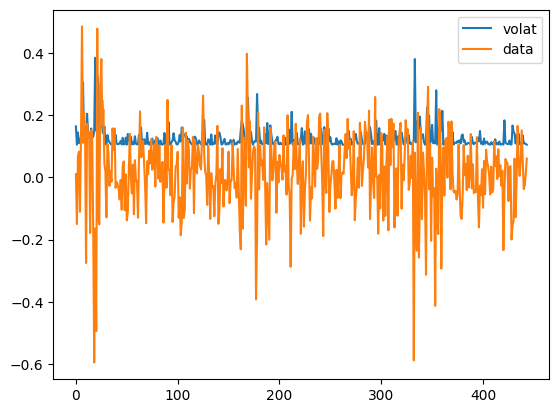

In [34]:
plt.plot(model.conditional_volatility, label = "volat")
plt.plot(data, label = "data")
plt.legend()
plt.show()

In [ ]:
model.plot();

In [35]:
model.forecast(reindex=False, horizon = 20).residual_variance ### longterm forecast ---

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,h.11,h.12,h.13,h.14,h.15,h.16,h.17,h.18,h.19,h.20
443,0.011924,0.015501,0.016824,0.017314,0.017495,0.017562,0.017587,0.017596,0.0176,0.017601,0.017602,0.017602,0.017602,0.017602,0.017602,0.017602,0.017602,0.017602,0.017602,0.017602


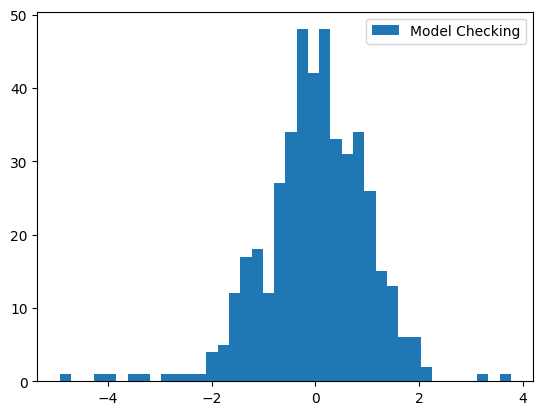

In [39]:
ress = model.resid/model.conditional_volatility
#ress_ = att/model.conditional_volatility
plt.hist(ress, label = "Model Checking", bins = 40)
#plt.plot(att, label = "Model Checking")
plt.legend()
plt.show()

In [40]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(ress, return_df = True)

,lb_stat,lb_pvalue
1,0.066146,0.797033
2,0.693941,0.706826
3,4.234483,0.237232
4,5.634314,0.228173
5,6.001725,0.306051
6,6.169838,0.404436
7,9.320301,0.230470
8,11.939934,0.153904
9,12.008587,0.212826
10,12.158323,0.274600
